# Analyzing PCOS symptoms 

### In this analysis I would like to find the most common syptoms of the disease

In [44]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
%matplotlib inline

In [34]:
#load dataset
df = pd.read_csv('pcos.csv')
df.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,#NAME?,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,#NAME?,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,#NAME?,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,#NAME?,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
5,6,6,0,36,74.1,165.0,#NAME?,15,78,28,...,0.0,0,110,70,9,6,16.0,20.0,8.0,NaN
6,7,7,0,34,64.0,156.0,#NAME?,11,72,18,...,0.0,0,120,80,6,6,15.0,16.0,6.8,NaN
7,8,8,0,33,58.5,159.0,#NAME?,13,72,20,...,0.0,0,120,80,7,6,15.0,18.0,7.1,NaN
8,9,9,0,32,40.0,158.0,#NAME?,11,72,18,...,0.0,0,120,80,5,7,17.0,17.0,4.2,NaN
9,10,10,0,36,52.0,150.0,#NAME?,15,80,20,...,0.0,0,110,80,1,1,14.0,17.0,2.5,NaN


In [35]:
#make a copy of data 
df_copy = df.copy()

## Cleaning:

In [16]:
#looking at all columns
for col in df.columns:
    print(col)

Sl. No
Patient File No.
PCOS (Y/N)
 Age (yrs)
Weight (Kg)
Height(Cm)
BMI
Blood Group
Pulse rate(bpm) 
RR (breaths/min)
Hb(g/dl)
Cycle(R/I)
Cycle length(days)
Marraige Status (Yrs)
Pregnant(Y/N)
No. of aborptions
  I   beta-HCG(mIU/mL)
II    beta-HCG(mIU/mL)
FSH(mIU/mL)
LH(mIU/mL)
FSH/LH
Hip(inch)
Waist(inch)
Waist:Hip Ratio
TSH (mIU/L)
AMH(ng/mL)
PRL(ng/mL)
Vit D3 (ng/mL)
PRG(ng/mL)
RBS(mg/dl)
Weight gain(Y/N)
hair growth(Y/N)
Skin darkening (Y/N)
Hair loss(Y/N)
Pimples(Y/N)
Fast food (Y/N)
Reg.Exercise(Y/N)
BP _Systolic (mmHg)
BP _Diastolic (mmHg)
Follicle No. (L)
Follicle No. (R)
Avg. F size (L) (mm)
Avg. F size (R) (mm)
Endometrium (mm)
Unnamed: 44


I will be dropping the following columns for a more concise analysis:
Marriage status


In [36]:
df = df.drop(['Marraige Status (Yrs)', 'Sl. No'], axis=1)
df

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,0,28,44.6,152.000,19.3,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,161.500,#NAME?,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,165.000,#NAME?,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,148.000,#NAME?,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,161.000,#NAME?,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,164.592,18.5,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,0,30,63.2,158.000,25.3,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,0,36,54.0,152.000,23.4,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,0,27,50.0,150.000,22.2,15,74,20,12.00,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [37]:
#cpnverting the heights from cm -> m
df['Height(Cm)'] = df['Height(Cm)']/100
df

In [39]:
#calculating BMI
df['BMI'] = df['Weight (Kg)']/(df['Height(Cm)'])**2
df

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,0,28,44.6,1.52000,19.304017,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,1.61500,24.921163,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,1.65000,25.270891,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,1.48000,29.674945,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,1.61000,20.060954,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,1.64592,18.456637,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,0,30,63.2,1.58000,25.316456,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,0,36,54.0,1.52000,23.372576,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,0,27,50.0,1.50000,22.222222,15,74,20,12.00,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [40]:
#rename columns 
df = df.rename(columns={'Patient File No.': 'Patient_No', 'PCOS (Y/N)':'PCOS',	' Age (yrs)':'Age',	'Weight (Kg)':'Weight',	'Height(Cm)':'Height',	'Blood Group':'Blood_group', 'Pulse rate(bpm) ': 'Pulse', 'RR (breaths/min)':'Respirations', 'Hb(g/dl)':'HBGN', 'Cycle(R/I)':'Cycle', 'Cycle length(days)':'Cycle_length',	'Pregnant(Y/N)':'Pregnant','No. of aborptions':'No_abortions',	'  I   beta-HCG(mIU/mL)': 'Case_I_beta-HCG', 'II    beta-HCG(mIU/mL)':'Case_II_beta-HCG', 'FSH(mIU/mL)':'FSH', 'LH(mIU/mL)':'LH',	'Hip(inch)':'Hip','Waist(inch)':'Waist', 'Waist:Hip Ratio':'Waist/Hip', 'TSH (mIU/L)': 'TSH','AMH(ng/mL)':'AMH',	'PRL(ng/mL)': 'PRL', 'Vit D3 (ng/mL)': 'Vit_D3', 'PRG(ng/mL)': 'PRG', 'RBS(mg/dl)': 'RBS','Weight gain(Y/N)':'Weight_gain', 'hair growth(Y/N)': 'Hair_growth', 'Skin darkening (Y/N)': 'Skin_darkening', 'Hair loss(Y/N)': 'Hair_loss', 'Pimples(Y/N)': 'Pimples', 'Fast food (Y/N)': 'Fast_food','Reg.Exercise(Y/N)': 'Regular_exercise', 'BP _Systolic (mmHg)': 'BP_D', 'BP _Diastolic (mmHg)': 'BP_S',	'Follicle No. (L)': '#_left_follicle',	'Follicle No. (R)':'#_right_follicle', 'Avg. F size (L) (mm)':'Avg_left_fol_size', 'Avg. F size (R) (mm)':'Avg_right_fol_size', 'Endometrium (mm)':'Endometrium'})
df

,Patient_No,PCOS,Age,Weight,Height,BMI,Blood_group,Pulse,Respirations,HBGN,...,Fast_food,Regular_exercise,BP_D,BP_S,#_left_follicle,#_right_follicle,Avg_left_fol_size,Avg_right_fol_size,Endometrium,Unnamed: 44
0,1,0,28,44.6,1.52000,19.304017,15,78,22,10.48,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,0,36,65.0,1.61500,24.921163,15,74,20,11.70,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,1,33,68.8,1.65000,25.270891,11,72,18,11.80,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,0,37,65.0,1.48000,29.674945,13,72,20,12.00,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,0,25,52.0,1.61000,20.060954,11,72,18,10.00,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,1.64592,18.456637,17,72,16,11.00,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,0,30,63.2,1.58000,25.316456,15,72,18,10.80,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,0,36,54.0,1.52000,23.372576,13,74,20,10.80,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,0,27,50.0,1.50000,22.222222,15,74,20,12.00,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [43]:
#drop last column "Unnamed"
df = df.drop('Unnamed: 44', axis=1)
df

,Patient_No,PCOS,Age,Weight,Height,BMI,Blood_group,Pulse,Respirations,HBGN,...,Pimples,Fast_food,Regular_exercise,BP_D,BP_S,#_left_follicle,#_right_follicle,Avg_left_fol_size,Avg_right_fol_size,Endometrium
0,1,0,28,44.6,1.52000,19.304017,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,1.61500,24.921163,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,1,33,68.8,1.65000,25.270891,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,0,37,65.0,1.48000,29.674945,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,1.61000,20.060954,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,0,35,50.0,1.64592,18.456637,17,72,16,11.00,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,0,30,63.2,1.58000,25.316456,15,72,18,10.80,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,0,36,54.0,1.52000,23.372576,13,74,20,10.80,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,0,27,50.0,1.50000,22.222222,15,74,20,12.00,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [55]:
#calculate waist:hip ratio
df['Waist/Hip'] = df['Waist']/df['Hip']
df['Waist/Hip']

0      0.833333
1      0.842105
2      0.900000
3      0.857143
4      0.810811
         ...   
536    0.928571
537    0.941176
538    0.933333
539    0.928571
540    0.958333
Name: Waist/Hip, Length: 541, dtype: float64

array([[<AxesSubplot:title={'center':'Patient_No'}>,
        <AxesSubplot:title={'center':'PCOS'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Blood_group'}>,
        <AxesSubplot:title={'center':'Pulse'}>,
        <AxesSubplot:title={'center':'Respirations'}>,
        <AxesSubplot:title={'center':'HBGN'}>,
        <AxesSubplot:title={'center':'Cycle'}>,
        <AxesSubplot:title={'center':'Cycle_length'}>],
       [<AxesSubplot:title={'center':'Pregnant'}>,
        <AxesSubplot:title={'center':'No_abortions'}>,
        <AxesSubplot:title={'center':'Case_I_beta-HCG'}>,
        <AxesSubplot:title={'center':'FSH'}>,
        <AxesSubplot:title={'center':'LH'}>,
        <AxesSubplot:title={'center':'Hip'}>],
       [<AxesSubplot:title={'center':'Waist'}>,
        <AxesSubplot:title={'center':'Waist/Hip'}>,

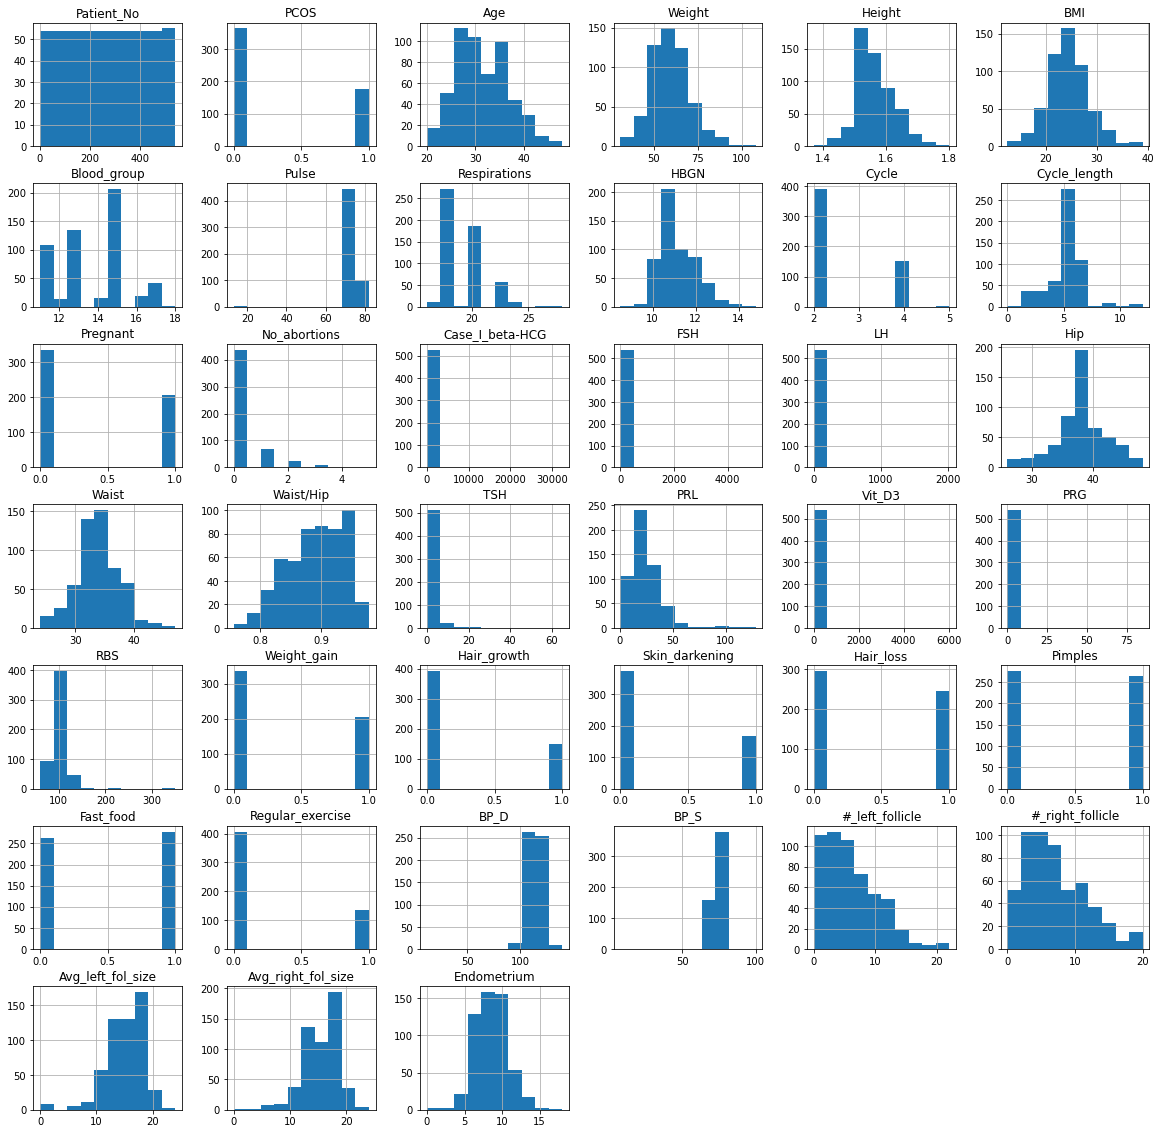

In [56]:
#plotting the parameters
df.hist(figsize=[20, 20])

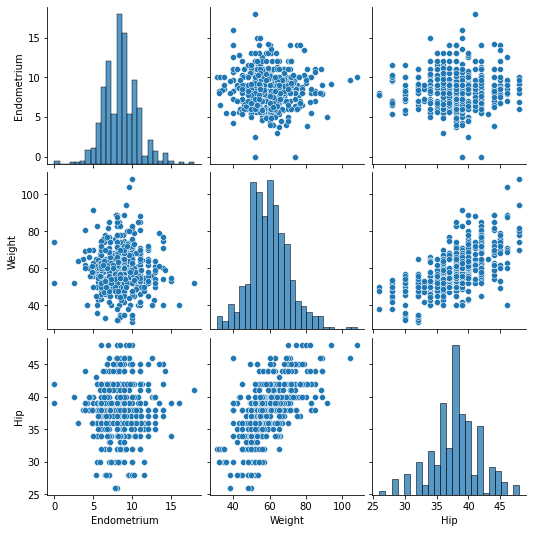

In [65]:
#plotting PCOS vs other parameters
sb.pairplot(df, vars=['Endometrium', 'Weight', 'Hip'])

In [7]:
#prob of skin darkening
df.skin_darkening.mean()

0.3068391866913124

In [9]:
pcos = df.query('PCOS == 1')
pcos

,PCOS,weight_gain,hair_growth,skin_darkening,hair_loss
2,1.0,0.0,0.0,0.0,1.0
12,1.0,1.0,1.0,1.0,1.0
19,1.0,0.0,1.0,1.0,1.0
24,1.0,0.0,1.0,0.0,0.0
26,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
520,1.0,0.0,1.0,0.0,0.0
523,1.0,1.0,0.0,0.0,0.0
524,1.0,1.0,0.0,0.0,0.0
533,1.0,0.0,0.0,0.0,0.0


In [11]:
#avg no. with skin darkening (SD)
pcos.skin_darkening.mean()

0.6214689265536724

## Applying Bayes Theory
### Prior:
pcos = 0.327 
Nopcos = (1 - 0.327) = 0.673
SD-pcos = 0.621 
NoSD-pcos = (1 - 0.621) = 0.379
SD-Nopcos = (1 - 0.846) = 0.154
NoSD-Nopcos = 0.846

### Posterior:
Prob of having skin darkening and PCOS
P(PCOS|SD) = 0.327 * 0.621 = 0.203

Prob of having skin darkening without PCOS P(NoPCOS|SD)= 0.673 * 0.154 = 0.104

### Normalizer:
Prob of skin darkening = P(PCOS|SD) + P(NoPCOS|SD) = 0.203 + 0.104 = 0.307

Therefore, the probability of having skin darkening and having PCOS is P(PCOS|SD)/Normalizer = 0.203/0.307 = 0.661

The probability of having skin darkening and not having PCOS is P(NoPCOS|SD)/Normalizer = 0.104/0.307 = 0.339